In [13]:
import pandas as pd
import numpy as np
# Import sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score
# Import the Naive Bayes, logistic regression, Bagging, RandomForest, AdaBoost, GradientBoost, Decision Trees and SVM Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')
from matplotlib.ticker import StrMethodFormatter
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer

In [22]:
train_df = pd.read_csv("D:/datasets/titanic/train.csv")
test_df = pd.read_csv("D:/datasets/titanic/test.csv")

In [23]:
train_df.head()
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
train_id = train_df['PassengerId']
test_id = test_df['PassengerId']
y_train = train_df['Survived']

train_df.drop('PassengerId', axis=1, inplace=True)
test_df.drop('PassengerId', axis=1, inplace=True)


In [25]:
data = [train_df, test_df]
for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)

    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [26]:
embarked_mode = train_df['Embarked'].mode()
data = [train_df, test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(embarked_mode)

In [27]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'travelled_alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'travelled_alone'] = 'Yes'

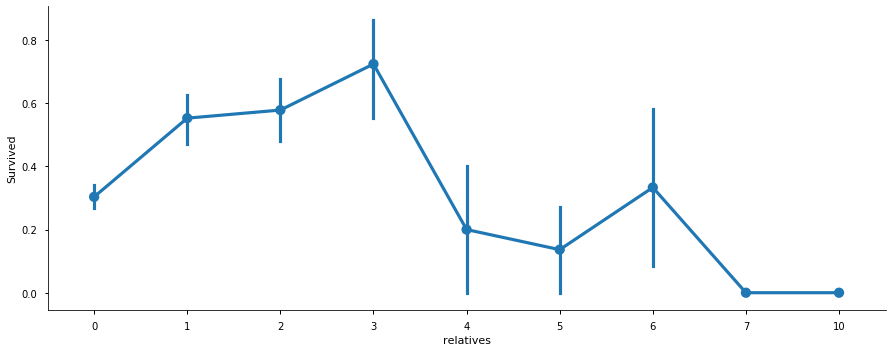

In [28]:
axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, );


In [29]:
train_numerical_features = list(train_df.select_dtypes(include=['int64', 'float64', 'int32']).columns)
ss_scaler = StandardScaler()
train_df_ss = pd.DataFrame(data = train_df)
train_df_ss[train_numerical_features] = ss_scaler.fit_transform(train_df_ss[train_numerical_features])

In [30]:
encode_col_list = list(train_df.select_dtypes(include=['object']).columns)
for i in encode_col_list:
    train_df_ss = pd.concat([train_df_ss,pd.get_dummies(train_df_ss[i], prefix=i)],axis=1)
    train_df_ss.drop(i, axis = 1, inplace=True)

In [31]:
train_df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,travelled_alone
0,-0.789272,0.827377,"Braund, Mr. Owen Harris",male,-0.551368,0.432793,-0.473674,A/5 21171,-0.502445,NaN,S,0.059160,No
1,1.266990,-1.566107,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.632769,0.432793,-0.473674,PC 17599,0.786845,C85,C,0.059160,No
2,1.266990,0.827377,"Heikkinen, Miss. Laina",female,-0.255334,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,NaN,S,-0.560975,Yes
3,1.266990,-1.566107,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.410743,0.432793,-0.473674,113803,0.420730,C123,S,0.059160,No
4,-0.789272,0.827377,"Allen, Mr. William Henry",male,0.410743,-0.474545,-0.473674,373450,-0.486337,NaN,S,-0.560975,Yes


In [32]:
train_df.drop('Survived', axis=1, inplace=True)

X_train = train_df
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)
logreg_data = pd.read_csv('test.csv')
logreg_data.insert((logreg_data.shape[1]),'Survived',logreg_predictions)
logreg_data.to_csv('LogisticRegression_SS_OH_FE2.csv')

d:\python demo\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'Yes'